In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
import geopandas as gpd
import contextily as ctx

from importlib import reload
import asp_plot.altimetry
reload(asp_plot.altimetry)

from asp_plot.altimetry import Altimetry

In [5]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
try:
    aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]
except:
    aligned_dem_fn = None


geojson_fn = "/Users/ben/Dropbox/UW_Shean/WV/2022/utqiagvik_wv_2022_sliderule_poly.geojson"

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [6]:
try:
    atl06sr = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_defaults_all.parquet"))
    atl06sr_filtered = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_defaults_filtered.parquet"))

    icesat = Altimetry(
        dem_fn=dem_fn, 
        geojson_fn=geojson_fn,
        aligned_dem_fn=aligned_dem_fn,
        atl06sr=atl06sr,
        atl06sr_filtered=atl06sr_filtered
    )
except:
    print("No existing ATL06 files found. You'll need to re-request")
    icesat = Altimetry(dem_fn=dem_fn, geojson_fn=geojson_fn, aligned_dem_fn=aligned_dem_fn)

No existing ATL06 files found. You'll need to re-request


In [7]:
if icesat.atl06sr is None:
    icesat.pull_atl06sr(
        esa_worldcover=True,
        filename=os.path.join(icesat_directory, "atl06sr_defaults_all"),
        parms=None,
    )

icesat.atl06sr


ICESat-2 ATL06 request processing with parms:
{'poly': [{'lon': -156.83342896997698, 'lat': 71.26658548886508}, {'lon': -156.83342896997698, 'lat': 71.39688565394232}, {'lon': -156.40964712543294, 'lat': 71.39688565394232}, {'lon': -156.40964712543294, 'lat': 71.26658548886508}, {'lon': -156.83342896997698, 'lat': 71.26658548886508}], 'samples': {'esa_worldcover': {'asset': 'esa-worldcover-10meter'}}}


,w_surface_window_final,dh_fit_dx,rms_misfit,h_mean,n_fit_photons,region,pflags,segment_id,spot,rgt,h_sigma,gt,y_atc,cycle,x_atc,geometry,esa_worldcover.time,esa_worldcover.value,esa_worldcover.flags,esa_worldcover.file_id
time,,,,,,,,,,,,,,,,,,,,
2018-11-20 23:50:33.174154752,55.280636,2.167735,0.0,17.163371,13,3,2,396664,4,815,0.0,30,-1144.029419,1,7950365.0,POINT (-156.77649 71.26717),1.309046e+12,30.0,0,77309411328
2018-11-20 23:50:33.176964608,165.354034,6.484427,0.0,87.613537,10,3,2,396665,4,815,0.0,30,-1143.732056,1,7950385.0,POINT (-156.77657 71.26735),1.309046e+12,30.0,0,77309411328
2018-11-20 23:50:33.205090304,30.000000,0.466165,0.0,37.413855,12,3,2,396675,4,815,0.0,30,-1144.028320,1,7950585.0,POINT (-156.77728 71.26913),1.309046e+12,30.0,0,77309411328
2018-11-20 23:50:33.207909376,30.000000,0.476847,0.0,60.672770,12,3,2,396676,4,815,0.0,30,-1143.878174,1,7950605.0,POINT (-156.77736 71.2693),1.309046e+12,30.0,0,77309411328
2018-11-20 23:50:33.210734336,72.097977,-2.827270,0.0,28.112882,10,3,2,396677,4,815,0.0,30,-1143.994751,1,7950625.0,POINT (-156.77743 71.26948),1.309046e+12,30.0,0,77309411328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:11.094880512,99.724335,-3.910685,0.0,6.809139,26,5,2,605115,1,381,0.0,60,-3294.791260,23,12121075.0,POINT (-156.7966 71.26757),1.309046e+12,30.0,0,94489280512
2024-04-12 14:33:11.097697792,38.653145,0.387910,0.0,-31.145281,29,5,2,605116,1,381,0.0,60,-3295.052734,23,12121096.0,POINT (-156.79668 71.26739),1.309046e+12,30.0,0,94489280512
2024-04-12 14:33:11.100488448,74.793251,0.755145,0.0,5.543802,39,5,2,605117,1,381,0.0,60,-3294.865967,23,12121116.0,POINT (-156.79674 71.26721),1.309046e+12,30.0,0,94489280512


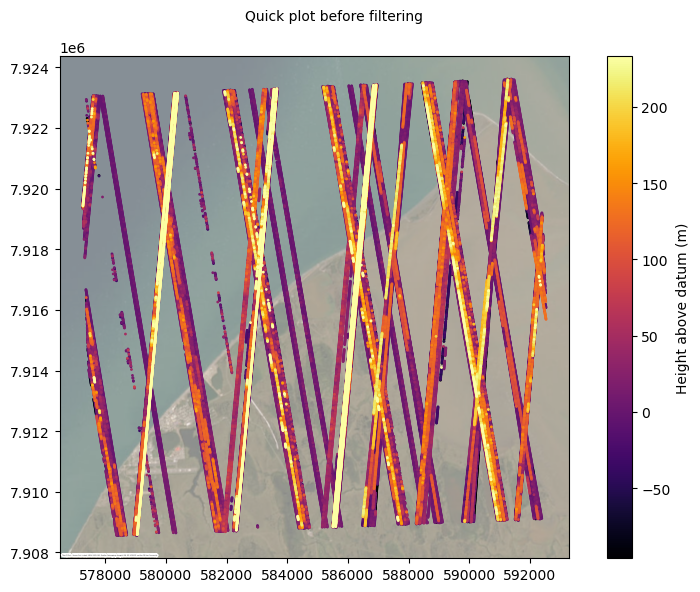

In [8]:
icesat.plot_atl06sr(
    title="Quick plot before filtering",
    map_crs=map_crs,
    **ctx_kwargs
)

In [9]:
# Filter data down
if icesat.atl06sr_filtered is None:
    icesat.filter_atl06sr(
        h_sigma_quantile=0.95,
        mask_worldcover_water=True,
        select_months=[4],
        select_years=[2022],
        filename=os.path.join(icesat_directory, "atl06sr_defaults_filtered"),
    )

icesat.atl06sr_filtered

,w_surface_window_final,dh_fit_dx,rms_misfit,h_mean,n_fit_photons,region,pflags,segment_id,spot,rgt,h_sigma,gt,y_atc,cycle,x_atc,geometry,esa_worldcover.time,esa_worldcover.value,esa_worldcover.flags,esa_worldcover.file_id
time,,,,,,,,,,,,,,,,,,,,
2022-04-17 01:15:56.210858496,2.817802e+30,-0.270834,110.285919,8.018268,1403,5,0,604607,1,381,2.945782,10,3311.705566,15,12110909.0,POINT (-156.57677 71.35026),1.309046e+12,60.0,0,343597383680
2022-04-17 01:15:56.213667072,2.817802e+30,-0.011684,110.418701,10.404119,1342,5,0,604608,1,381,3.018122,10,3311.723145,15,12110929.0,POINT (-156.57684 71.35008),1.309046e+12,50.0,0,343597383680
2022-04-17 01:15:56.467532800,2.817802e+30,-0.302511,110.559227,10.793766,1352,5,0,604698,1,381,3.006820,10,3309.837402,15,12112730.0,POINT (-156.5835 71.33408),1.309046e+12,90.0,0,343597383680
2022-04-17 01:15:56.470372096,2.817802e+30,0.354565,109.539993,12.207522,1337,5,0,604699,1,381,2.996143,10,3309.811523,15,12112750.0,POINT (-156.58357 71.3339),1.309046e+12,90.0,0,343597383680
2022-04-17 01:15:56.473208832,2.817802e+30,-0.212886,108.065369,14.636826,1392,5,0,604700,1,381,2.898190,10,3309.765869,15,12112770.0,POINT (-156.58365 71.33372),1.309046e+12,90.0,0,343597383680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17 01:15:57.956873728,2.817802e+30,-0.126240,128.640915,31.508872,1019,5,0,605115,6,381,4.031635,60,-3313.850586,15,12121075.0,POINT (-156.79713 71.26759),1.309046e+12,30.0,0,343597383680
2022-04-17 01:15:57.959680000,2.817802e+30,0.268331,126.163605,27.358112,1015,5,0,605116,6,381,3.966863,60,-3313.866211,15,12121096.0,POINT (-156.7972 71.26741),1.309046e+12,30.0,0,343597383680
2022-04-17 01:15:57.962488064,2.817802e+30,0.775467,121.138504,33.570501,977,5,0,605117,6,381,3.876797,60,-3313.767578,15,12121116.0,POINT (-156.79727 71.26723),1.309046e+12,30.0,0,343597383680


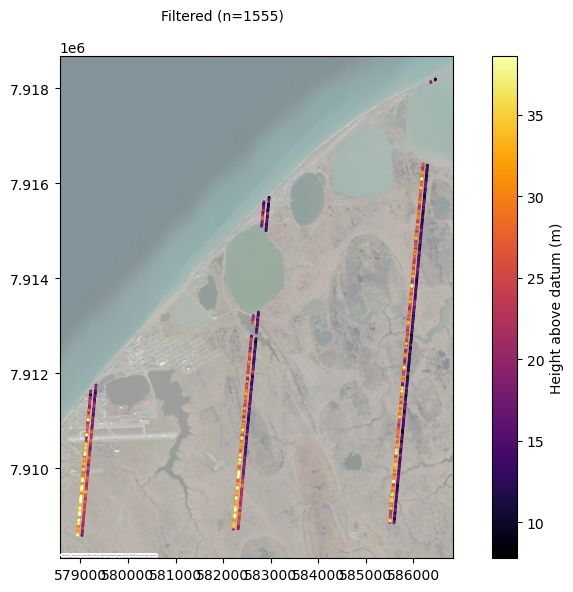

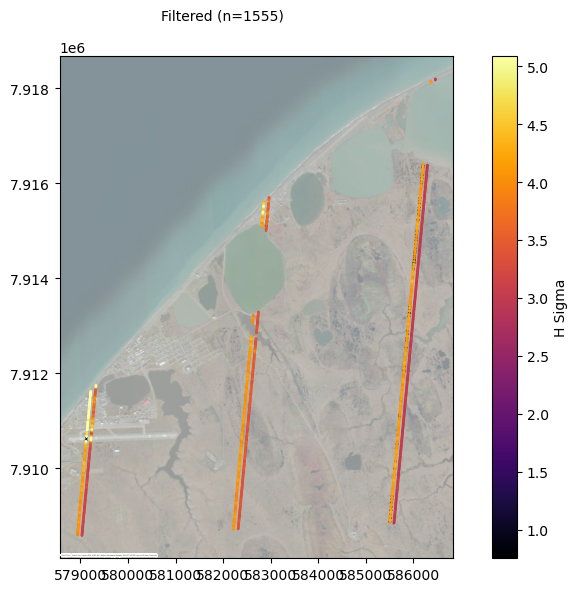

In [11]:
icesat.plot_atl06sr(
    title=f"Filtered (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    map_crs=map_crs,
    **ctx_kwargs
)

icesat.plot_atl06sr(
    title=f"Filtered (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    map_crs=map_crs,
    column_name="h_sigma",
    cbar_label="H Sigma",
    **ctx_kwargs
)

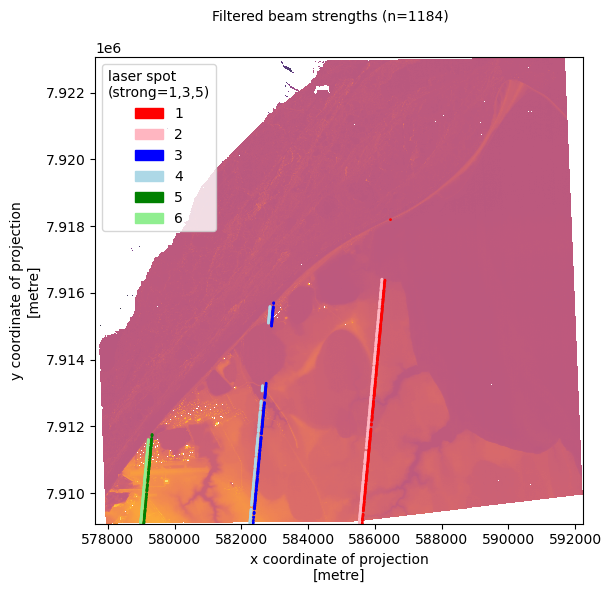

In [49]:
icesat.plot_atl06sr(
    title=f"Filtered beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    use_dem_basemap=True,
    map_crs=map_crs,
    **ctx_kwargs
)


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



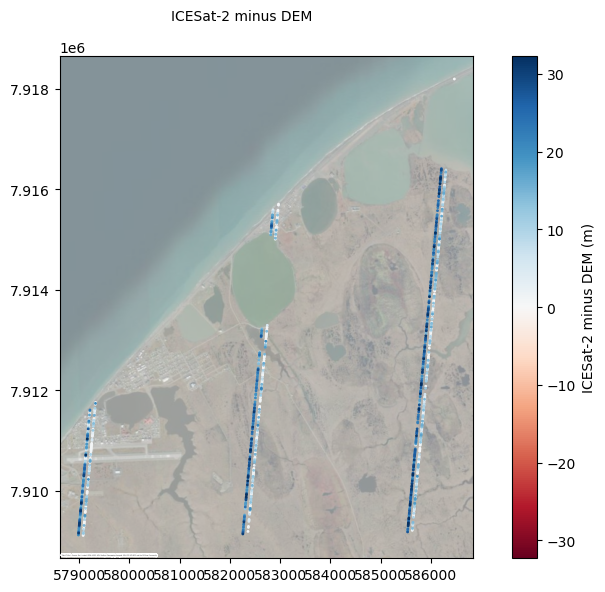

In [50]:
icesat.compare_atl06sr_to_dem(
    title="ICESat-2 minus DEM",
    **ctx_kwargs
)

In [51]:
# Previous mismatch indicates need for pc_align step
icesat.pc_align_dem_to_atl06sr(
    atl06sr_csv=os.path.join(icesat_directory, "atl06sr_filtered.csv"),
    output_prefix=os.path.join(directory, "pc_align/pc_align"),
)

--> Setting number of processing threads to: 4

Creating output directory: "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align".
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align-log-pc_align-08-01-2248-4476.txt
Will use datum (for CSV files): Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
Computing the bounding boxes of the reference and source points using 9000000 sample points.
Computation of bounding boxes took 13.137 [s]
Reference points box: Origin: (-156.826, 71.2694) width: 0.401829 height: 0.124855
Source points box:    Origin: (-156.798, 71.2663) width: 0.22219 height: 0.0842259
Intersection reference box:  Origin: (-156.798, 71.2694) width: 0.22219 height: 0.0811688
Intersection source    box:  Origin: (-156.798, 71.2694) 

In [55]:
icesat.generate_translated_dem(
    pc_align_output=os.path.join(directory, "pc_align/pc_align-trans_reference.tif"),
    dem_out_fn=dem_fn.replace(".tif", "_pc_align_translated"),
)

--> Setting number of processing threads to: 4
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated-log-point2dem-08-01-2254-17865.txt
The point cloud files must have an equal number of channels which must be 4 or 6 to be able to remove outliers.

Point cloud extent estimation: [..........................................] 0%
Point cloud extent estimation: [..........................................] 1%
Point cloud extent estimation: [..........................................] 2%
Point cloud extent estimation: [*.........................................] 3%
Point cloud extent estimation: [*.........................................] 4%
Point cloud extent estimation: [**........................................] 5%
Point cloud extent estimation: [**........

In [58]:
icesat.aligned_dem_fn = dem_fn.replace(".tif", "_pc_align_translated-DEM.tif")


Using aligned DEM for comparison.


Using aligned DEM for comparison.



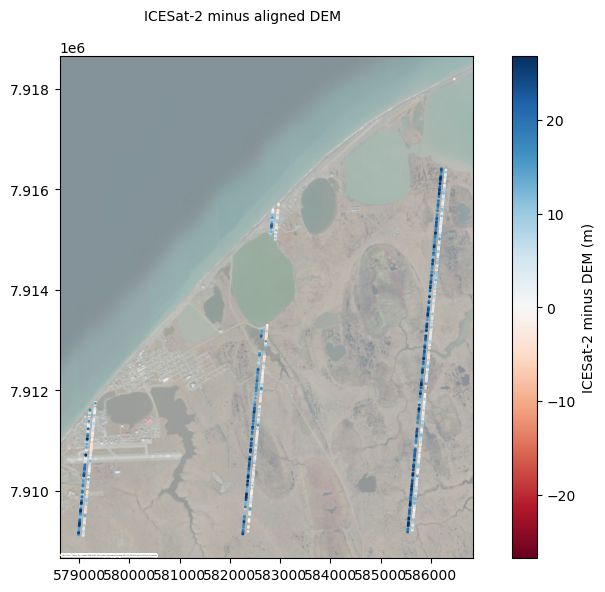

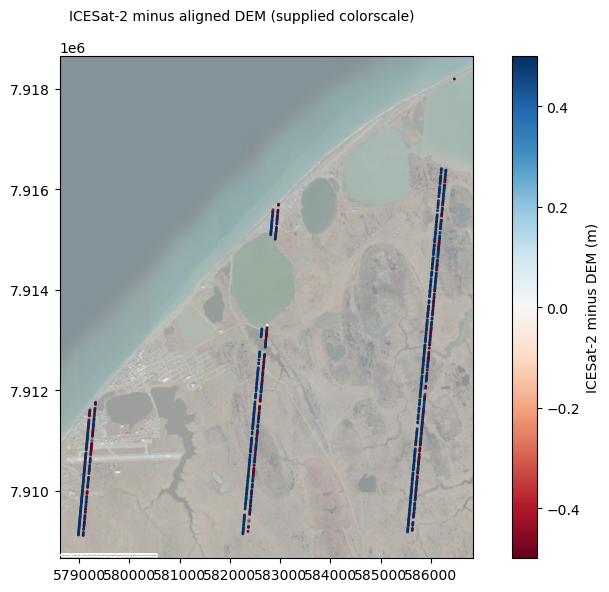

In [59]:
# Quickly compare the translated DEM to the ATL06 data
icesat.compare_atl06sr_to_dem(title = "ICESat-2 minus aligned DEM", use_aligned_dem=True, **ctx_kwargs)

icesat.compare_atl06sr_to_dem(title = "ICESat-2 minus aligned DEM (supplied colorscale)", clim=(-0.5, 0.5), use_aligned_dem=True, **ctx_kwargs)

In [61]:
# Gather a larger subset of data for validation
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=False,
    select_months=[3, 4, 5],
    save_to_csv=False,
    save_to_gpkg=False,
    file_to_save=os.path.join(icesat_directory, "atl06sr_filtered_noWaterMask_MarchAprilMay_allTime_for_validation"),
)

,n_fit_photons,spot,x_atc,y_atc,w_surface_window_final,dh_fit_dx,pflags,cycle,rms_misfit,segment_id,h_sigma,rgt,gt,region,h_mean,esa_worldcover.file_id,esa_worldcover.flags,esa_worldcover.value,esa_worldcover.time,geometry
time,,,,,,,,,,,,,,,,,,,,
2019-04-18 16:42:25.758,736,3,7951087.5,4860.481445,5.799953e+20,-0.209321,0,3,86.361397,396696,3.190147,312,30,3,-1.992327,184683593728,0,80.0,1.309046e+12,POINT (-156.4261 71.2666)
2019-04-18 16:42:25.761,750,3,7951107.5,4860.437012,1.031103e+21,0.211128,0,3,84.909294,396697,3.105118,312,30,3,-2.542358,184683593728,0,80.0,1.309046e+12,POINT (-156.42618 71.26678)
2019-04-18 16:42:25.764,733,3,7951127.5,4860.357910,5.799953e+20,-0.316492,0,3,79.875534,396698,2.950737,312,30,3,-0.940236,184683593728,0,80.0,1.309046e+12,POINT (-156.42625 71.26696)
2019-04-18 16:42:25.767,730,3,7951147.5,4860.274414,1.031103e+21,0.030006,0,3,79.317123,396699,2.936219,312,30,3,0.417156,184683593728,0,80.0,1.309046e+12,POINT (-156.42632 71.26713)
2019-04-18 16:42:25.769,760,3,7951167.5,4860.208496,1.031103e+21,-0.210451,0,3,84.042885,396700,3.049138,312,30,3,0.106438,184683593728,0,90.0,1.309046e+12,POINT (-156.42639 71.26731)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:08.668,71,4,12106206.0,52.733665,1.031103e+21,-1.398296,0,23,51.961163,604372,7.032969,381,30,5,-1.576862,227633266688,0,80.0,1.309046e+12,POINT (-156.65017 71.39586)
2024-04-12 14:33:09.709,71,3,12111129.0,-34.619816,1.031103e+21,0.192848,0,23,62.546719,604618,7.448154,381,40,5,1.662242,227633266688,0,80.0,1.309046e+12,POINT (-156.67049 71.35221)
2024-04-12 14:33:10.657,10,2,12120435.0,-3207.792725,5.091055e+01,-1.996348,0,23,10.070227,605083,3.213951,381,50,5,-25.488793,227633266688,0,30.0,1.309046e+12,POINT (-156.79191 71.27316)



Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



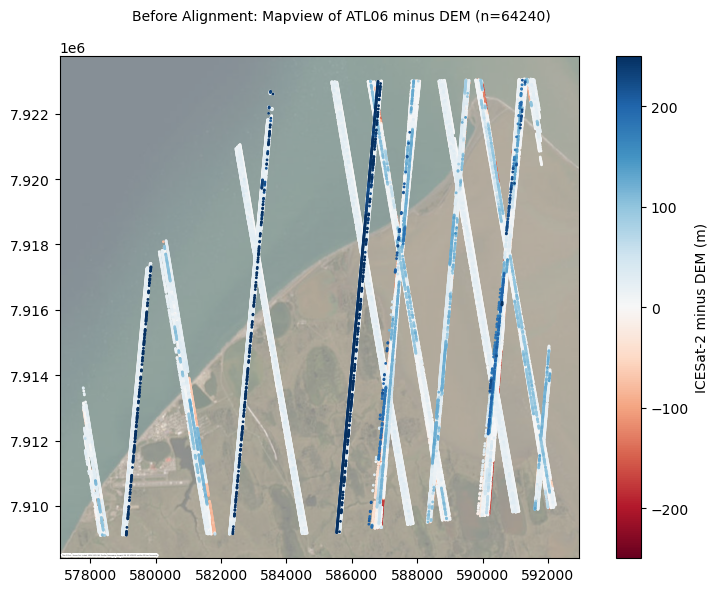

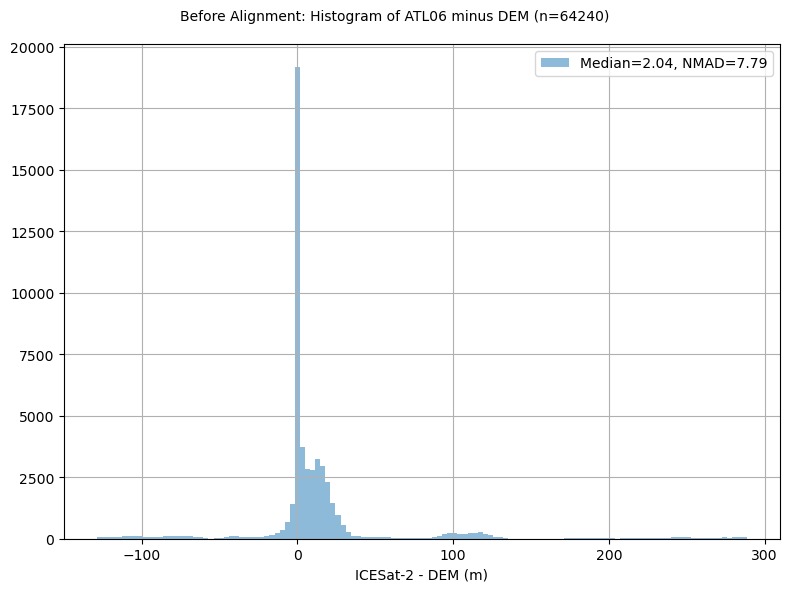

In [62]:
# Validate (before)
icesat.compare_atl06sr_to_dem(title=f"Before Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", **ctx_kwargs)
icesat.histogram(title=f"Before Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")


Using aligned DEM for comparison.



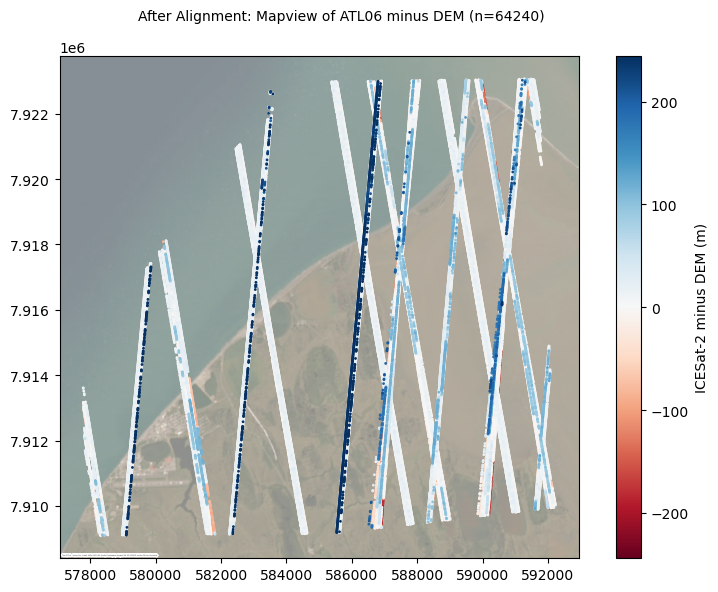

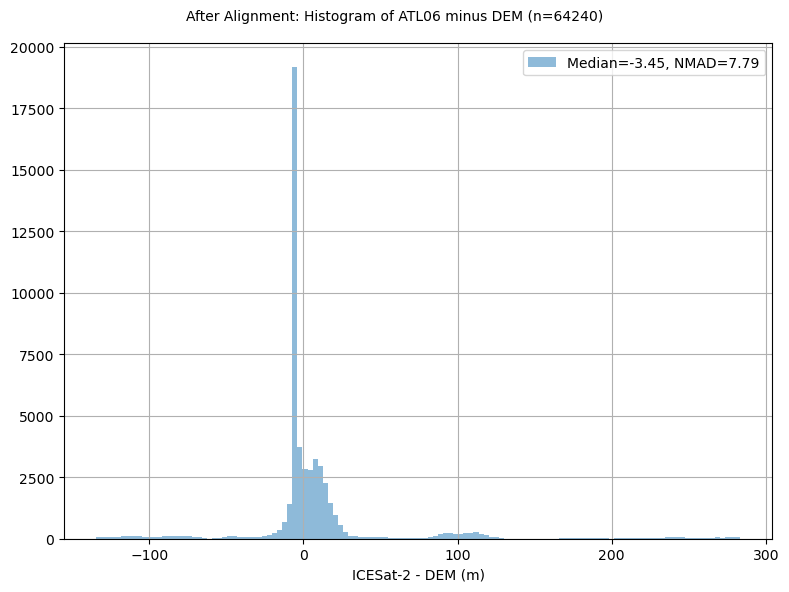

In [63]:
# Validate (after)
icesat.compare_atl06sr_to_dem(title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", use_aligned_dem=True, **ctx_kwargs)
icesat.histogram(title=f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")


Using aligned DEM for comparison.



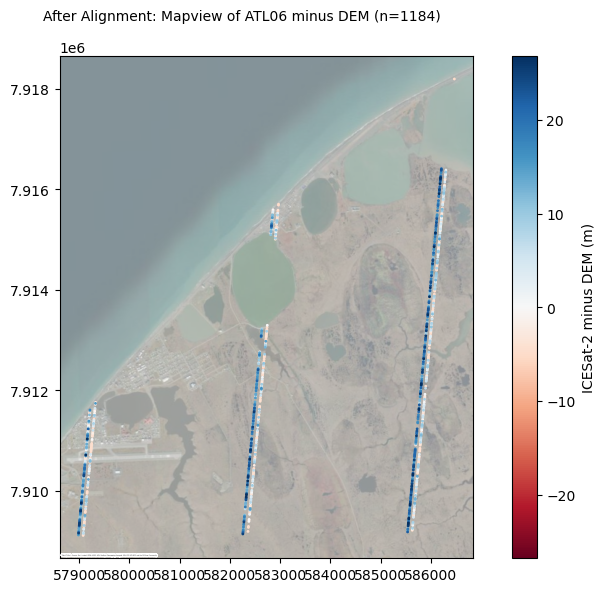

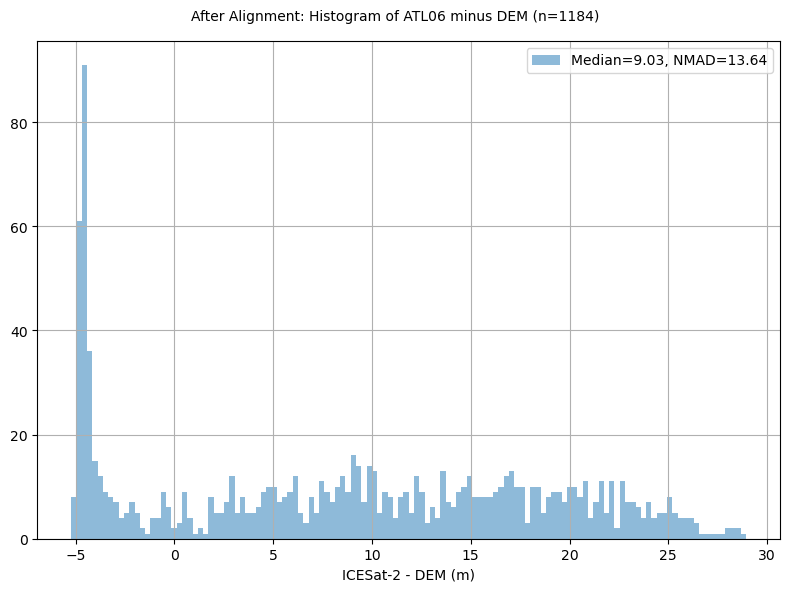

In [64]:
# Collect only the coincident filtereded data again for profile plotting
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    select_months=[4],
    select_years=[2022],
)

icesat.compare_atl06sr_to_dem(title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", use_aligned_dem=True, **ctx_kwargs)

icesat.histogram(title=f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")

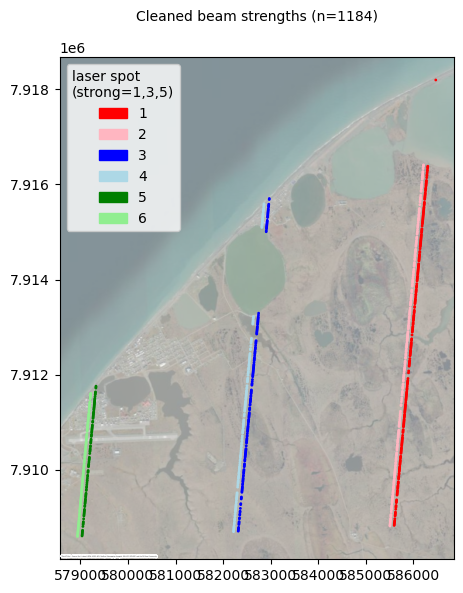

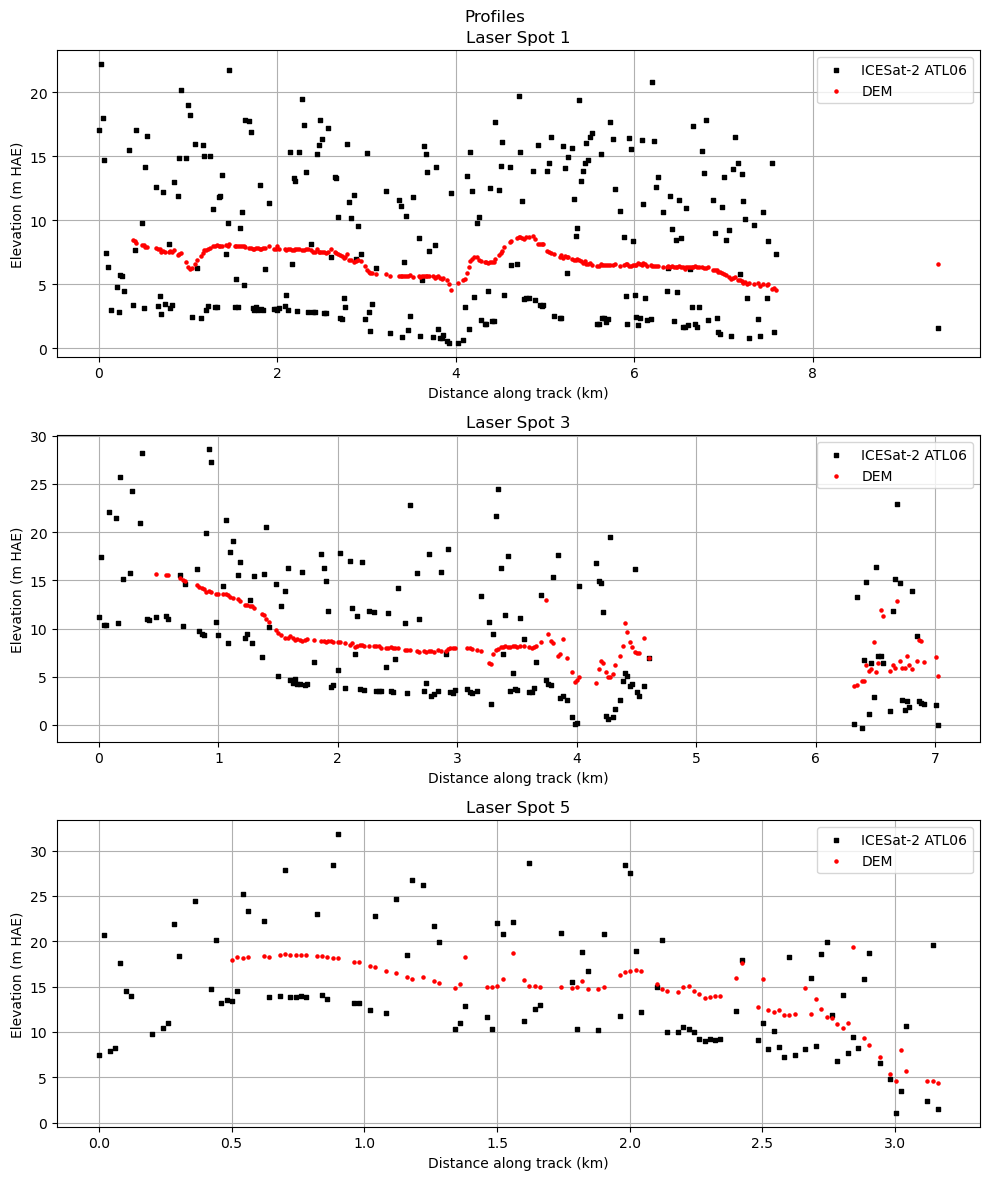

In [65]:
icesat.plot_atl06sr(
    title=f"Cleaned beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    use_dem_basemap=False,
    map_crs=map_crs,
    **ctx_kwargs
)

icesat.plot_atl06sr_dem_profiles(title="Profiles", only_strong_beams=True)